<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Worksheets/10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [1]:
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib  
import matplotlib.pyplot as plt
import seaborn as sns

def get_data():
  !rm movies.csv
  # upload a set of chosen files then read a specified file
  uploaded = files.upload()
  df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))
  return df 

mov_data = get_data()
print(mov_data.info())
print(mov_data.describe())

rm: cannot remove 'movies.csv': No such file or directory


Saving movies.csv to movies.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB
None
          Unnamed: 0           year           rank
count  368894.000000  368894.000000  113376.000000
mean   184446.500000    1969.442222       5.995124
std    106490.669438      29.082051       1.540330
min         0.000000    1888.000000       1.000000
25%     92223.250000    1947.000000       5.100000
50%    184446.500000    1976.000000       6.200000
75%    276669.750000    1996.000000       7.100000
max 

### Clean the dataset 
---


In [2]:
mov_df = mov_data.drop_duplicates()
print(mov_df.info())

mov_df_rank = mov_df.dropna()
print(mov_df_rank.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 113376 entries, 77 to 368891
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  113376 non-null  int64  
 1   first_name  113376 non-null  object 
 2   last_name   113376 non-null  object 
 3   name        113376 non-null  object 
 4   year        113376 non-null  int64  
 5   rank        113376 non-null  float

Only the column of rank has null values. I prefer to keep the original data frame the same for all the other column calculations that doesn't involve rank. This is so that I do not lose other information. From here on, I will be using mov_df for all calculation that doesn't require the rank column. I will be using mov_df_rank for those that require rank column.

### How many movies of each genre are there?
---

In [3]:
genres = mov_df['genre'].value_counts()
print(genres)

Short          72894
Drama          72635
Comedy         54667
Documentary    35698
Animation      17038
Romance        13562
Action         12890
Crime          12610
Family         11074
Thriller       10681
Adventure       8598
Western         8231
Horror          7423
Musical         6843
Sci-Fi          4957
Mystery         4951
Fantasy         4871
Music           4444
War             4398
Film-Noir        429
Name: genre, dtype: int64


### Which director has the highest ranked movies?
---

In [108]:
dir_df = mov_df_rank
dir_df['dir_name'] = mov_df_rank['first_name']+' ' + mov_df_rank['last_name']
dir_df =dir_df.drop(columns=['first_name', 'last_name'])
dir_rank = dir_df.groupby(['dir_name'])['rank'].max()
dir_ave = dir_df.groupby(['dir_name'])['rank'].mean()
dir_count = dir_df['dir_name'].value_counts()
full_name = dir_df['dir_name'].unique()
#print(full_name)
d = {'name': full_name,'max_rank': dir_rank, 'mean_rank': dir_ave, 'count': dir_count}
top_dir = pd.DataFrame(data=d)
dir_toprank = top_dir.sort_values(["max_rank", "count"],ascending = (False, False))
print(dir_toprank)

                                        name  max_rank  mean_rank  count
Carole Roussopoulos           Barry Caillier       9.9   8.785714     77
Jonathan Demme        Sirkka-Liisa Konttinen       9.9   6.700000     33
Sergiu Nicolaescu             Steve Stafford       9.9   8.045161     31
Jim Jarmusch                    Peter Kahane       9.9   7.288000     25
Jirí (I) Trnka                   Joseph Kane       9.9   7.256522     23
...                                      ...       ...        ...    ...
Michael (III) Howard          Juan (I) Muñoz       1.0   1.000000      1
Peter (II) Welch                Ed Ragozzino       1.0   1.000000      1
Ryan Shiraki                  Claudia Silver       1.0   1.000000      1
Tom Rook                      Joseph Velasco       1.0   1.000000      1
Victor Adamson                    Ben Washam       1.0   1.000000      1

[22104 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### How many movies have ranks of over 9?
---


In [53]:
high_rank = mov_df_rank[mov_df_rank['rank'] > 9].count()
high_rank[0]

1483

### Plot a bar chart of mean rank and genre
---

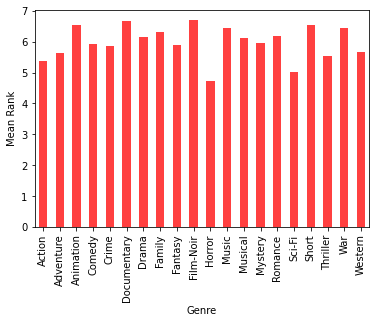

In [54]:
rank_by_genre = mov_df_rank.groupby('genre')['rank'].mean()
bar_plot = rank_by_genre.plot(x="genre", y=rank_by_genre, kind="bar", alpha=0.75, rot=90, color = 'r')
bar_plot.set_xlabel("Genre")
bar_plot.set_ylabel("Mean Rank")
plt.show()

### Plot a pie chart of how many movies of each genre there are 
---


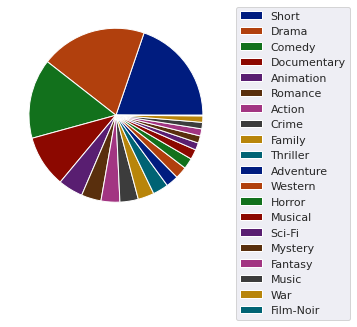

In [78]:
x = genres.keys()
y = genres
sns.set(style="darkgrid")
colors = sns.color_palette('dark')
plt.pie(y, colors =colors)
plt.legend(labels = x,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Plot a graph showing the mean Rank for each year 

In [ ]:
rank_by_genre = mov_df_rank.groupby('genre')['rank'].mean()
bar_plot = rank_by_genre.plot(x="genre", y=rank_by_genre, kind="bar", alpha=0.75, rot=90, color = 'r')
bar_plot.set_xlabel("Genre")
bar_plot.set_ylabel("Mean Rank")
plt.show()

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  
2.  
3.   

### Complete the tasks you have set out in the exercise above. 
---


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: